In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
from keras.utils import np_utils
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 8]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [33]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


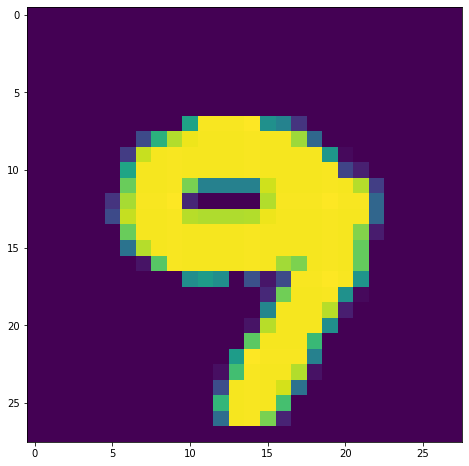

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 147 253 253 253 255 128 113  38
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  57 163 226 249 252 252 252 253 

In [34]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample])
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [35]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [36]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)
x_train = x_train / 255 # minmax 스케일링 : 0~1 사이의 값으로 바꿔주려고
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [37]:
model = Sequential()
model.add(Dense(128, input_dim=28*28, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
fit_hist = model.fit(x_train, y_train, batch_size=128,
                     validation_split=0.2, epochs=15, verbose=1)

Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.9019 - val_loss: 0.1683 - val_accuracy: 0.9511
Epoch 2/15
375/375 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9578 - val_loss: 0.1250 - val_accuracy: 0.9646
Epoch 3/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9716 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 4/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9773 - val_loss: 0.0983 - val_accuracy: 0.9698
Epoch 5/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0906 - val_accuracy: 0.9737
Epoch 6/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0892 - val_accuracy: 0.9756
Epoch 7/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0887 - val_accuracy: 0.9745
Epoch 

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final Test set accuracy :', score[1])

Final Test set accuracy : 0.9775999784469604
